## Directed Study: Robbery and Theft of vehicles in São Paulo state in 2016/2017

#### Author: Ramon de Carvalho Nogueira 
#### LinkedIn: https://www.linkedin.com/in/ramonrcn/
#### E-Mail: ramon_rcn@hotmail.com
#### Start date: 14/02/2018
#### Public data available at http://www.ssp.sp.gov.br/transparenciassp/

### This study has the following objectives:
    Objectively and quickly display collected data by SSP.
    Answer the folowing questions:
        - Which vehicles are most targeted?
        - Which vechicles are less targeted?
        - Total occurrences for each model.
        - Total occurrences by locality.
        - Cities with the highest number of occurrences.
        - Which regions with the highest occurrence index?
        - Check month by month the number of Thefts x Stealing for cars and motorcycles

### In addition to satisfying some personal curiosities
    - There is a favourite colour prefered by thugs when taking your car?
    - The cars are newer or older?
    Among others that will appear during the process and that will be highlighted during the Notebook.
    
### Will be divided in parts
    In order to facilitate understanding, the study will be divided into parts:
        
        Processing the data of 2016 thefts
        Processing the data of 2017 thefts
        Processing the data of 2016 robbery
        Processing the data of 2017 robbery
        
        Value generation based on the processed data of robbery and theft on the 2016/2017 period.
           

# Treating the 2016 Theft data


In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
%matplotlib inline


I did a pre process of the dataset before maipulating the data. Gathered the data of 2016 theft in a single file.
The dataset still is ful of 'holes' and empty entries, which must be treated according to the desired objective.

In [2]:
#Reading the file and setting some columns to datetime format
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Furtos_2016.txt'
Furtos2016 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO", "DATAELABORACAO"])
Furtos2016.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158654 entries, 0 to 158653
Data columns (total 34 columns):
ID                         158654 non-null int64
ANO_BO                     158654 non-null int64
NUM_BO                     158654 non-null int64
BO_INICIADO                158654 non-null datetime64[ns]
BO_EMITIDO                 158654 non-null datetime64[ns]
DATAOCORRENCIA             158654 non-null datetime64[ns]
PERIDOOCORRENCIA           158654 non-null object
DATACOMUNICACAO            158654 non-null datetime64[ns]
DATAELABORACAO             158654 non-null datetime64[ns]
BO_AUTORIA                 158654 non-null object
FLAGRANTE                  158654 non-null object
LOGRADOURO                 141651 non-null object
NUMERO                     158646 non-null float64
BAIRRO                     129159 non-null object
CIDADE                     141651 non-null object
UF                         141651 non-null object
LATITUDE                   141549 non-null object
L

In [3]:
#Removing the column ID that i used on SQL
Furtos2016.drop('ID', axis = 1, inplace = True)
Furtos2016.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
3,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de veículo,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,2016-05-27 09:18:09,Conhecida,Sim,...,Localização/Apreensão e Entrega de veículo,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL


## Anomaly analisys
    Exploring, knowing, filtering and removing invalid values on the key fields

In [4]:
Furtos2016.describe(include=['object'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,158654,158654,158654,141651,129159,141651,141651,141549,141549,158654,...,158654,158654,158654,158654,134598,135253,135117,135255,134701,134701
unique,5,3,2,44552,10951,543,1,89691,89708,29,...,958,28,184,2,116724,27,1418,16,3920,23
top,A NOITE,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-228,711,916,309,999","-471,995,525,679,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,FIAT/UNO ELETRONIC,AUTOMOVEL
freq,42061,138184,148884,315,8860,54784,141651,218,218,101262,...,1765,137255,125096,158476,36,130714,46338,29106,2181,87801


#### To be considered:
  
      Plate XXX-0000 -> Doesn't officially exists   




In [5]:
#Printing the entries with plate XXX0000

for y, x in Furtos2016.iterrows():
    if x.PLACA_VEICULO == 'XXX0000':
        print(y, x.DATAOCORRENCIA,' ',x.DELEGACIA_NOME,' ',x.PLACA_VEICULO,' ',x.UF_VEICULO,' ',
              x.CIDADE_VEICULO,' ',x.DESCR_TIPO_VEICULO,' ',x.DESCR_MARCA_VEICULO )


2566 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
2568 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
2570 2016-11-29 00:00:00   37º D.P. CAMPO LIMPO   XXX0000   SP   S.PAULO   AUTOMOVEL   IMP/VW GOL CLI
17831 2016-11-20 00:00:00   DEL.POL.PLANTÃO JABOTICABAL   XXX0000   SP   S.PAULO   TRATOR RODAS   M.A./CASE
19861 2016-06-15 00:00:00   DEL.POL.ARARAS   XXX0000   SP   ARARAS   TRATOR RODAS   M.A./MASSEY-FERGUSON
32021 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
32024 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
32027 2016-09-15 00:00:00   DEL.SEC.RIO CLARO PLANTÃO   XXX0000   SP   S.PAULO   AUTOMOVEL   CITROEN/C3 XTR 16 FLEX
33967 2016-05-29 00:00:00   02º D.P. SANTO ANDRÉ   XXX0000   SP   S.PAULO   INEXIST.   MO/JCB 214E
34864 2016-06-21 00:00:00   14º D.

### The license plates.
        
    Normally every vehicle has plates. Except in the period that they're bought brand new.
    And taking in consideretion that car dealers can be stolen, we have 2 options:
    
    Delete the entries and focus only on theft of vehicles already licensed, or take in consideration the thefts of 
    vehicles without plate, utilizing more filtration and analysing each information with more care.
    
    To this study, i'm ignoring the cars without a license plate.
   

In [6]:
#Verifying the most repeated values

Furtos2016['PLACA_VEICULO'].value_counts().head()

XXX0000    36
*******    14
0          13
EBU0034    11
DPQ5472    11
Name: PLACA_VEICULO, dtype: int64

In [7]:
#Deleting the data that doesn't attend the criteria

data=[]

for i, l in Furtos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000':
        data.append(i)
    elif l.PLACA_VEICULO == '*******':
        data.append(i)
    elif l.PLACA_VEICULO == '0':
        data.append(i)

Furtos2016.drop(data, axis=0, inplace=True)

Furtos2016['PLACA_VEICULO'].value_counts().head()

BNJ4777    11
EBU0034    11
DUW1113    11
DPQ5472    11
ELT6787    10
Name: PLACA_VEICULO, dtype: int64

In [8]:
#Checking for blank values on the column 'PLACA_VEICULO'
Furtos2016['PLACA_VEICULO'].isnull().value_counts()

False    134535
True      24056
Name: PLACA_VEICULO, dtype: int64

In [9]:
#Dropping all the entries with empty value for the license plate
Furtos2016.dropna(subset=['PLACA_VEICULO'], axis=0, inplace=True)
Furtos2016['PLACA_VEICULO'].isnull().value_counts()

False    134535
Name: PLACA_VEICULO, dtype: int64

In [10]:
#After looking the file with more attention, i noticed that the values of the columns BO_INICIADO and DATAELABORACAO where the same
Furtos2016.drop('DATAELABORACAO', axis=1, inplace=True)

#### Applying filters.
    Analysing the file on Excel, I understood why so many duplicated values, mainly in column 'PLACA_VEICULO'
    On the example below, the selected records show the theft of the vehicle and the localization.
    Then, its normal of this dataset to have some values in duplicity, and filtering by the license plate isn't effective.
    
    Therefore, I will treat the information based on the columns 'ESPECIE' and 'RUBRICA', which will allow to manipulate with more precision the information of the dataset

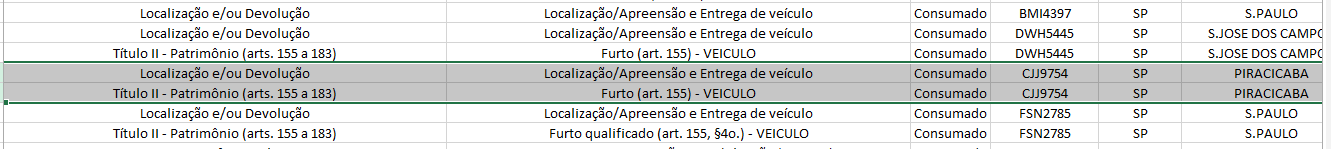

In [11]:
Furtos2016['ESPECIE'].value_counts().head(10)

Título II - Patrimônio (arts. 155 a 183)                 123120
Localização e/ou Devolução                                 8115
Ato infracional                                            1900
L 9503/97 - Código de Trânsito Brasileiro                   224
L 8069/90 - ECA                                             199
Título I - Pessoa (arts. 121 a 154)                         142
Acidente de trânsito                                        137
Título X - Fé pública (arts. 289 a 311)                     112
Título XI - Administração pública (arts. 312 a 359-H)       108
Título IX - Paz pública (arts. 286 a 288)                    97
Name: ESPECIE, dtype: int64

In [12]:
Furtos2016['ESPECIE'].isnull().value_counts()

False    134535
Name: ESPECIE, dtype: int64

##### Separating in a new DF all the vehicles Located and/or Returned in 2016

In [13]:
Furtolocdev2016 = Furtos2016[(Furtos2016.ESPECIE == 'Localização e/ou Devolução')]

Furtolocdev2016.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
4,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de veículo,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009.0,2009.0,AUTOMOVEL
5,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de veículo,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011.0,2012.0,AUTOMOVEL
21,2016,376,2016-05-27 10:09:43,2016-05-27 11:57:56,2016-05-27,PELA MANHÃ,2016-05-27,Desconhecida,Não,VICINAL CAFELANDIA/VILA BELEM,...,Localização/Apreensão de veículo,Consumado,DHF6008,SP,CAFELANDIA,Azul,VW/GOLF GENERATION,2002.0,2003.0,AUTOMOVEL


In [14]:
#Checking for duplicated records filtering by the license plate
Furtolocdev2016['PLACA_VEICULO'].value_counts().head()

FJU8883    6
CAW2048    4
CDS7896    4
BYS4869    4
BLV3512    4
Name: PLACA_VEICULO, dtype: int64

In [15]:
#Cleaning the duplicated records
Furtolocdev2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Furtolocdev2016['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CBW4810    1
BPT2641    1
FVV8907    1
DYI6882    1
FYV6388    1
Name: PLACA_VEICULO, dtype: int64

In [16]:
#Saving to a new csv file
Furtolocdev2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Furtolocdev2016.csv')

 With the Located and/or Returned vehicles saved in a separate file, i'll assume each plate as unique on the main Dataset
    

In [17]:
#Deleting the duplicated records on the main dataset
Furtos2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)

In [18]:
Furtos2016.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,116721,116721,116721,105983,95823,105983,105983,105953,105953,116721,...,116721,116721,116721,116721,116721,116720,116585,116721,116197,116197
unique,5,3,2,43033,10595,540,1,84686,84689,29,...,955,22,114,2,116721,27,1414,16,3836,20
top,A NOITE,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-232,144,468,931,052","-468,457,230,086,009",Via pública,...,14º D.P. PINHEIROS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,CCK1240,SP,S.PAULO,Preta,FIAT/UNO ELETRONIC,AUTOMOVEL
freq,31013,111900,114847,217,7062,42465,105983,103,103,73112,...,1276,109264,104361,116704,1,112848,40549,25403,1818,76668


###### Now we treat the blank values

In [19]:
branco = Furtos2016.isnull()
branco.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#Counting the blank records for each column
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    116721
Name: ANO_BO, dtype: int64

NUM_BO
False    116721
Name: NUM_BO, dtype: int64

BO_INICIADO
False    116721
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    116721
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    116721
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    116721
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    116721
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    116721
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    116721
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    105983
True      10738
Name: LOGRADOURO, dtype: int64

NUMERO
False    116720
True          1
Name: NUMERO, dtype: int64

BAIRRO
False    95823
True     20898
Name: BAIRRO, dtype: int64

CIDADE
False    105983
True      10738
Name: CIDADE, dtype: int64

UF
False    105983
True      10738
Name: UF, dtype: int64

LATITUDE
False    105953
True      10768
Name: LATITUDE, dtype: int64

LONGITUDE
False    105953
True      10768
Name: LON

In [21]:
Furtos2016.dropna(subset = ['UF'], axis = 0, inplace = True)

Furtos2016['LATITUDE'].isnull().value_counts().head(5)

False    105953
True         30
Name: LATITUDE, dtype: int64

In [22]:
Furtos2016.dropna(subset = ['DESCR_MARCA_VEICULO'], axis = 0, inplace = True)
Furtos2016['CIDADE_VEICULO'].isnull().value_counts().head(5)

False    105327
True        132
Name: CIDADE_VEICULO, dtype: int64

In [23]:
Furtos2016['DESCR_TIPO_VEICULO'].isnull().value_counts().head()

False    105459
Name: DESCR_TIPO_VEICULO, dtype: int64

In [24]:
Furtos2016.dropna(subset = ['LATITUDE','UF_VEICULO','CIDADE_VEICULO','ANO_FABRICACAO','ANO_MODELO'], axis = 0, inplace = True)

In [25]:
#checking again to see the difference 
branco = Furtos2016.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    105202
Name: ANO_BO, dtype: int64

NUM_BO
False    105202
Name: NUM_BO, dtype: int64

BO_INICIADO
False    105202
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    105202
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    105202
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    105202
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    105202
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    105202
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    105202
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    105202
Name: LOGRADOURO, dtype: int64

NUMERO
False    105202
Name: NUMERO, dtype: int64

BAIRRO
False    95223
True      9979
Name: BAIRRO, dtype: int64

CIDADE
False    105202
Name: CIDADE, dtype: int64

UF
False    105202
Name: UF, dtype: int64

LATITUDE
False    105202
Name: LATITUDE, dtype: int64

LONGITUDE
False    105202
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    105202
Name: DESCRICAOLOCAL, dtype: int64

EXAME
T

In [26]:
#Converting some columns to int
Furtos2016['ANO_MODELO'] = Furtos2016.ANO_MODELO.astype(int)
Furtos2016['ANO_FABRICACAO'] = Furtos2016.ANO_FABRICACAO.astype(int)
Furtos2016['NUMERO'] = Furtos2016.NUMERO.astype(int)
Furtos2016.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009,2009,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011,2012,AUTOMOVEL
9,2016,670209,2016-05-27 11:26:36,2016-05-27 11:26:36,2016-05-26,PELA MANHÃ,2016-05-27,Desconhecida,Não,RUA BENTO RODRIGUES DA SILVA,...,Furto (art. 155) - VEICULO,Consumado,BNO7895,SP,S.ANDRE,Verde,FIAT/UNO ELETRONIC,1993,1993,AUTOMOVEL
10,2016,2027,2016-05-27 11:19:03,2016-05-27 11:27:58,2016-05-27,DE MADRUGADA,2016-05-27,Desconhecida,Não,ALAMEDA RIBEIRAO PRETO,...,Furto (art. 155) - VEICULO,Consumado,FJJ9789,SP,S.PAULO,Branco,CHEVROLET/CELTA 1.0L LT,2014,2015,AUTOMOVEL
11,2016,1432,2016-05-27 11:29:21,2016-05-27 11:37:55,2016-12-05,A NOITE,2016-05-27,Desconhecida,Não,RUA VINTE E TRES DE SETEMBRO,...,Furto (art. 155) - VEICULO,Consumado,CDG6640,SP,S.PAULO,Cinza,FORD/ESCORT GHIA,1988,1988,AUTOMOVEL


In [27]:
#Reseting the index
Furtos2016.reindex()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EJK0466,SP,FERRAZ DE VASCONCELO,Vermelho,GM/CORSA HATCH PREMIUM,2009,2009,AUTOMOVEL
2,2016,2654,2016-05-27 09:18:09,2016-05-27 11:26:16,2016-05-27,DE MADRUGADA,2016-05-27,Conhecida,Sim,RUA IGARAPE AGUA AZUL,...,Localização/Apreensão e Entrega de objeto,Consumado,EYO5878,SP,PRAIA GRANDE,Cinza,VW/FOX 1.6 GII,2011,2012,AUTOMOVEL
9,2016,670209,2016-05-27 11:26:36,2016-05-27 11:26:36,2016-05-26,PELA MANHÃ,2016-05-27,Desconhecida,Não,RUA BENTO RODRIGUES DA SILVA,...,Furto (art. 155) - VEICULO,Consumado,BNO7895,SP,S.ANDRE,Verde,FIAT/UNO ELETRONIC,1993,1993,AUTOMOVEL
10,2016,2027,2016-05-27 11:19:03,2016-05-27 11:27:58,2016-05-27,DE MADRUGADA,2016-05-27,Desconhecida,Não,ALAMEDA RIBEIRAO PRETO,...,Furto (art. 155) - VEICULO,Consumado,FJJ9789,SP,S.PAULO,Branco,CHEVROLET/CELTA 1.0L LT,2014,2015,AUTOMOVEL
11,2016,1432,2016-05-27 11:29:21,2016-05-27 11:37:55,2016-12-05,A NOITE,2016-05-27,Desconhecida,Não,RUA VINTE E TRES DE SETEMBRO,...,Furto (art. 155) - VEICULO,Consumado,CDG6640,SP,S.PAULO,Cinza,FORD/ESCORT GHIA,1988,1988,AUTOMOVEL
12,2016,1926,2016-05-27 11:25:20,2016-05-27 11:39:49,2016-05-27,EM HORA INCERTA,2016-05-27,Desconhecida,Não,RUA GIUSSEPPINA BONINE,...,Furto (art. 155) - VEICULO,Consumado,DSL0836,SP,S.PAULO,Preta,RENAULT/CLIO AUT 10 16VH,2005,2006,AUTOMOVEL
13,2016,2178,2016-05-27 11:30:00,2016-05-27 11:42:10,2016-05-25,A NOITE,2016-05-27,Desconhecida,Não,RUA HAROLDO PACHECO E SILVA,...,Furto (art. 155) - VEICULO,Consumado,EMY4816,SP,S.PAULO,Vermelho,GM/CELTA 4P SPIRIT,2010,2010,AUTOMOVEL
14,2016,670245,2016-05-27 11:42:53,2016-05-27 11:42:53,2016-05-26,A NOITE,2016-05-27,Desconhecida,Não,Garcia Lorca,...,Furto (art. 155) - VEICULO,Consumado,CED8876,SP,S.PAULO,Bege,FIAT/FIAT PREMIO S,1985,1985,AUTOMOVEL
15,2016,2055,2016-05-27 11:35:29,2016-05-27 11:44:00,2016-05-27,PELA MANHÃ,2016-05-27,Desconhecida,Não,RUA ORAIDA TAVARES DOMINGUITO,...,Furto (art. 155) - VEICULO,Consumado,FIU2445,SP,OSASCO,Branco,FIAT/PUNTO ATTRACTIVE,2013,2013,AUTOMOVEL
17,2016,2151,2016-05-27 11:25:02,2016-05-27 11:46:02,2016-05-27,PELA MANHÃ,2016-05-27,Desconhecida,Não,RUA DOS ARTISTAS,...,Furto (art. 155) - VEICULO,Consumado,EZH1195,SP,S.PAULO,Branco,I/KIA UK2500 HD SC,2011,2012,CAMINHONETE


In [28]:
Furtos2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105202 entries, 1 to 158649
Data columns (total 32 columns):
ANO_BO                     105202 non-null int64
NUM_BO                     105202 non-null int64
BO_INICIADO                105202 non-null datetime64[ns]
BO_EMITIDO                 105202 non-null datetime64[ns]
DATAOCORRENCIA             105202 non-null datetime64[ns]
PERIDOOCORRENCIA           105202 non-null object
DATACOMUNICACAO            105202 non-null datetime64[ns]
BO_AUTORIA                 105202 non-null object
FLAGRANTE                  105202 non-null object
LOGRADOURO                 105202 non-null object
NUMERO                     105202 non-null int32
BAIRRO                     95223 non-null object
CIDADE                     105202 non-null object
UF                         105202 non-null object
LATITUDE                   105202 non-null object
LONGITUDE                  105202 non-null object
DESCRICAOLOCAL             105202 non-null object
EXAME      

In [29]:
#Saving the DF as .csv to future usage and further analysis
Furtos2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Furtos2016_v1.csv')

# Tratando dos Furtos de 2017

In [30]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Furtos_2017.txt'
Furtos2017 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO", "DATAELABORACAO"])
Furtos2017.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147108 entries, 0 to 147107
Data columns (total 34 columns):
ID                         147108 non-null int64
ANO_BO                     147108 non-null int64
NUM_BO                     147108 non-null int64
BO_INICIADO                147108 non-null datetime64[ns]
BO_EMITIDO                 147108 non-null datetime64[ns]
DATAOCORRENCIA             147108 non-null datetime64[ns]
PERIDOOCORRENCIA           147108 non-null object
DATACOMUNICACAO            147108 non-null datetime64[ns]
DATAELABORACAO             147108 non-null datetime64[ns]
BO_AUTORIA                 147108 non-null object
FLAGRANTE                  147108 non-null object
LOGRADOURO                 132056 non-null object
NUMERO                     147092 non-null float64
BAIRRO                     121409 non-null object
CIDADE                     132056 non-null object
UF                         132056 non-null object
LATITUDE                   131944 non-null object
L

In [31]:
#Removing the column ID that i used on SQL and the column DATAELABORACAO to match the 2016 dataset
Furtos2017.drop(['ID','DATAELABORACAO'], axis=1, inplace=True)
Furtos2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2017,2154,2017-03-13 22:40:00,2017-03-13 22:45:42,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA JÚLIO SOARES MOTA,...,Furto (art. 155) - VEICULO,Consumado,BMU6966,SP,CAMPINAS,Azul,FORD/ESCORT 1.6I GLX,1995.0,1995.0,AUTOMOVEL
1,2017,1161,2017-03-13 22:44:17,2017-03-13 22:49:38,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA MANOEL DIAS MARCELINO,...,Furto (art. 155) - VEICULO,Consumado,DCS5165,SP,SANTOS,Verde,HONDA/C100 BIZ ES,2001.0,2001.0,MOTONETA
2,2017,363149,2017-03-13 22:50:08,2017-03-13 22:50:08,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,R. ALEGRE,...,Furto (art. 155) - VEICULO,Consumado,EVK6745,SP,S.CAETANO DO SUL,Cinza,I/CHEVROLET AGILE LTZ,2010.0,2010.0,AUTOMOVEL
3,2017,620,2017-03-13 22:53:10,2017-03-13 22:57:12,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,RUA OLÍMPIO CATÃO,...,Furto (art. 155) - VEICULO,Consumado,DDJ4662,SP,JACAREI,Branco,FIAT/FIORINO IE,2000.0,2001.0,CAMINHONETE
4,2017,1541,2017-03-13 22:37:33,2017-03-13 22:57:52,2017-03-13,A NOITE,2017-03-13,Desconhecida,Não,AVENIDA ANTONIA PIZZINATO STURION,...,Furto (art. 155) - VEICULO,Consumado,EZT1618,SP,PIRACICABA,Preta,VW/GOL 1.6,2012.0,2012.0,AUTOMOVEL


In [32]:
#Looking for anomalies
Furtos2017.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,147108,147108,147108,132056,121409,132056,132056,131944,131944,147108,...,147108,147108,147108,147108,121876,122371,122220,122371,122002,122002
unique,5,3,2,42107,9767,543,1,84338,84349,30,...,964,27,176,2,105764,29,1412,16,3919,22
top,PELA MANHÃ,Desconhecida,Não,AVENIDA BRASIL,CENTRO,S.PAULO,SP,"-22,761,094,185,692","-471,562,524,543,034",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,GM/CORSA WIND,AUTOMOVEL
freq,40662,127782,137119,260,7980,52438,132056,137,137,94321,...,1553,127560,115461,146918,33,117826,43578,26912,1832,80564


In [33]:
#Verifying the most repeated values
Furtos2017['PLACA_VEICULO'].value_counts().head()

XXX0000    33
EIP9800    16
DDW0111    16
FJT8929    16
FTI5956    16
Name: PLACA_VEICULO, dtype: int64

In [34]:
#Deleting the data that doesn't attend the criteria

data=[]

for i, l in Furtos2017.iterrows():
    if l.PLACA_VEICULO == 'XXX0000':
        data.append(i)
    
Furtos2017.drop(data, axis=0, inplace=True)

Furtos2016['PLACA_VEICULO'].value_counts().head()

ESH0883    1
DTY0098    1
EKI4398    1
FAL7083    1
DZQ8778    1
Name: PLACA_VEICULO, dtype: int64

In [35]:
#Checking for blank values on the column 'PLACA_VEICULO'
Furtos2017['PLACA_VEICULO'].isnull().value_counts()

False    121843
True      25232
Name: PLACA_VEICULO, dtype: int64

In [36]:
#Dropping all the entries with empty value for the license plate
Furtos2017.dropna(subset=['PLACA_VEICULO'], axis=0, inplace=True)
Furtos2017['PLACA_VEICULO'].isnull().value_counts()

False    121843
Name: PLACA_VEICULO, dtype: int64

In [37]:
#Filtering the vehicles located and/or returned

Furtolocdev2017 = Furtos2017[Furtos2017.ESPECIE == 'Localização e/ou Devolução']


In [38]:
Furtolocdev2017

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
45,2017,2790,2017-03-13 20:51:57,2017-03-14 01:06:53,2017-03-13,A TARDE,2017-03-13,Conhecida,Sim,RUA PALMARES,...,Localização/Apreensão e Entrega de veículo,Consumado,BIF4675,SP,ITAPIRA,Bege,VW/GOL GL,1988.0,1988.0,AUTOMOVEL
53,2017,1962,2017-03-14 01:15:09,2017-03-14 01:20:11,2017-03-13,PELA MANHÃ,2017-03-14,Desconhecida,Não,RUA CAPITAO FONSECA ROSA,...,Localização/Apreensão e Entrega de veículo,Consumado,EMJ5490,SP,S.PAULO,Vermelho,VW/NOVO GOL 1.6 RALLYE,2013.0,2014.0,AUTOMOVEL
61,2017,2797,2017-03-14 02:12:02,2017-03-14 02:13:06,2017-03-13,A TARDE,2017-03-14,Conhecida,Sim,RUA PALMARES,...,Localização/Apreensão e Entrega de veículo,Consumado,BIF4675,SP,ITAPIRA,Bege,VW/GOL GL,1988.0,1988.0,AUTOMOVEL
85,2017,850,2017-03-14 06:02:17,2017-03-14 07:49:06,2017-03-14,DE MADRUGADA,2017-03-14,Conhecida,Não,RUA JANDIRA DE LIMA CAMARGO,...,Localização/Apreensão e Entrega de veículo,Consumado,CYA4327,SP,MAIRIPORA,Azul,FIAT/UNO MILLE SMART,2000.0,2001.0,AUTOMOVEL
104,2017,4531,2017-11-27 20:37:19,2017-11-28 06:29:05,2017-11-27,A TARDE,2017-11-27,Conhecida,Sim,AVENIDA DEPUTADO CASTRO DE CARVALHO,...,Localização/Apreensão e Entrega de veículo,Consumado,CFG6942,SP,POA,Vermelho,FIAT/UNO MILLE IE,1996.0,1996.0,AUTOMOVEL
112,2017,3708,2017-11-28 06:50:10,2017-11-28 08:15:11,2017-11-28,DE MADRUGADA,2017-11-28,Desconhecida,Não,RUA OTÁVIO DIAS ARAÚJO,...,Localização/Apreensão de veículo,Consumado,CFU2764,SP,RIBEIRAO BONITO,Verde,VW/SANTANA GLS,1989.0,1989.0,AUTOMOVEL
132,2017,2069,2017-11-28 08:48:23,2017-11-28 09:31:41,2017-11-28,DE MADRUGADA,2017-11-28,Desconhecida,Não,RUA JOSE ESTEVES,...,Localização/Apreensão de veículo,Consumado,CME8583,SP,RIO CLARO,Prata,GM/BLAZER DLX,1998.0,1998.0,UTILITÁRIO
188,2017,4798,2017-07-31 18:38:55,2017-07-31 19:46:46,2017-07-31,A NOITE,2017-07-31,Conhecida,Sim,RUA GUAMIRANGA,...,Localização/Apreensão e Entrega de veículo,Consumado,EQD6244,SP,DIADEMA,Roxa,YAMAHA/FAZER YS250,2010.0,2011.0,MOTOCICLO
208,2017,6408,2017-07-31 20:35:36,2017-07-31 20:41:23,2017-05-04,A NOITE,2017-07-31,Desconhecida,Não,RUA SEBASTIÃO DE MORÃES,...,Localização/Apreensão e Entrega de veículo,Consumado,BVA9277,SP,ATIBAIA,Verde,FORD/FIESTA,1997.0,1997.0,AUTOMOVEL
262,2017,5932,2017-07-31 22:57:27,2017-07-31 23:13:35,2017-07-30,PELA MANHÃ,2017-07-31,Desconhecida,Não,RUA MANUEL HOMEM DE ALMEIDA,...,Localização/Apreensão e Entrega de veículo,Consumado,PYO5002,MG,BELO HORIZONTE,Cinza,RENAULT/SANDERO EXPR 10,2016.0,2017.0,AUTOMOVEL


In [39]:
#Checking for repeated plate values
Furtolocdev2017['PLACA_VEICULO'].value_counts().head()

FJT8929    6
FNL5628    6
ELG3662    6
FTI5956    6
EIP9800    6
Name: PLACA_VEICULO, dtype: int64

In [40]:
#Dropping the duplicated records
Furtolocdev2017.drop_duplicates(['PLACA_VEICULO'], keep = 'first', inplace = True)
Furtolocdev2017['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CDO5182    1
DUQ8041    1
DQS7373    1
ESA8239    1
GFN7390    1
Name: PLACA_VEICULO, dtype: int64

In [41]:
#Saving to a new csv file
Furtolocdev2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Furtolocdev2017.csv')

In [42]:
#Checking for empty values on the main dataframe
branco = Furtos2017.isnull()
branco.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
#Counting the blank records for each column
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print('')


ANO_BO
False    121843
Name: ANO_BO, dtype: int64

NUM_BO
False    121843
Name: NUM_BO, dtype: int64

BO_INICIADO
False    121843
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    121843
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    121843
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    121843
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    121843
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    121843
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    121843
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    110061
True      11782
Name: LOGRADOURO, dtype: int64

NUMERO
False    121835
True          8
Name: NUMERO, dtype: int64

BAIRRO
False    101369
True      20474
Name: BAIRRO, dtype: int64

CIDADE
False    110061
True      11782
Name: CIDADE, dtype: int64

UF
False    110061
True      11782
Name: UF, dtype: int64

LATITUDE
False    109967
True      11876
Name: LATITUDE, dtype: int64

LONGITUDE
False    109967
True      11876
Name: L

In [49]:
Furtos2017.dropna(subset = ['DESCR_TIPO_VEICULO', 'CIDADE_VEICULO', 'ANO_MODELO', 'ANO_FABRICACAO'], axis = 0, inplace = True)
Furtos2017['UF'].isnull().value_counts().head()

False    109442
Name: UF, dtype: int64

In [50]:
Furtos2017.dropna(subset = ['UF', 'NUMERO'], axis = 0, inplace = True)
Furtos2017['LATITUDE'].isnull().value_counts().head()

False    109348
True         94
Name: LATITUDE, dtype: int64

In [51]:
#Checking again to see the difference
branco = Furtos2017.isnull()

for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print('')


ANO_BO
False    109442
Name: ANO_BO, dtype: int64

NUM_BO
False    109442
Name: NUM_BO, dtype: int64

BO_INICIADO
False    109442
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    109442
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    109442
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    109442
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    109442
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    109442
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    109442
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    109442
Name: LOGRADOURO, dtype: int64

NUMERO
False    109442
Name: NUMERO, dtype: int64

BAIRRO
False    100903
True       8539
Name: BAIRRO, dtype: int64

CIDADE
False    109442
Name: CIDADE, dtype: int64

UF
False    109442
Name: UF, dtype: int64

LATITUDE
False    109348
True         94
Name: LATITUDE, dtype: int64

LONGITUDE
False    109348
True         94
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    109442
Name: DES

In [52]:
#Saving the DF as .csv to further analysis
Furtos2017.to_csv('C:\\Python\\Data Science Projects\\Roubos e Furtos Veículos\\3 - Dados Consolidados\\Furtos2017_v1.csv')